In [ ]:
 # Dispersion-assisted Optical Phase Recovery

Mostly chatgpt code for Gergberg Saxon Algorithm


In [ ]:
import numpy
import matplotlib

In [ ]:
# Let's define a function that implements the basic structure of the Gerchberg-Saxton algorithm.
# The algorithm is an iterative process that finds the phase of a wave function from its magnitude.
# It uses Fourier transforms to switch between the spatial and frequency domains.

import numpy as np

def gerchberg_saxton(magnitude, initial_phase=None, iterations=10):
    """
    Implement the Gerchberg-Saxton algorithm to retrieve the phase from the magnitude of a wave function.

    :param magnitude: The magnitude of the wave function.
    :param initial_phase: An initial guess for the phase.
    :param iterations: The number of iterations to perform.
    :return: The retrieved phase of the wave function.
    """
    # If no initial phase is supplied, start with a random phase
    if initial_phase is None:
        phase = np.random.rand(*magnitude.shape) * 2 * np.pi
    else:
        phase = initial_phase

    # Create a complex field from magnitude and phase
    field = magnitude * np.exp(1j * phase)

    for _ in range(iterations):
        # Forward Fourier Transform
        F_field = np.fft.fftshift(np.fft.fft(field))

        # Enforce the magnitude constraint in the Fourier domain
        F_field = magnitude * np.exp(1j * np.angle(F_field))

        # Inverse Fourier Transform
        field = np.fft.ifft(np.fft.ifftshift(F_field))

        # Enforce the magnitude constraint in the spatial domain
        field = magnitude * np.exp(1j * np.angle(field))

    # Return the retrieved phase
    return np.angle(field)

# We can test this function with a simple example
test_magnitude = np.abs(np.fft.fft(np.random.rand(512)))
recovered_phase = gerchberg_saxton(test_magnitude, iterations=100)

# Let's return the result to check if the function is working correctly.
recovered_phase[:10]  # Return only the first 10 values to keep the output concise


array([-3.02299798,  0.70957235, -1.72650443,  0.99598863, -2.28233825,
        0.90788237, -2.00026593,  0.85215135, -1.80265124,  0.89703664])

In [ ]:
# Let's create a chirp signal, which is a signal whose frequency increases over time, as the input magnitude.

def generate_chirp_signal(length, start_freq, end_freq, rate):
    """
    Generate a chirp signal with increasing frequency.

    :param length: Number of points in the signal.
    :param start_freq: Starting frequency of the chirp.
    :param end_freq: Ending frequency of the chirp.
    :param rate: Sample rate of the chirp signal.
    :return: The generated chirp signal.
    """
    t = np.linspace(0, length / rate, length)
    frequencies = np.linspace(start_freq, end_freq, length)
    chirp_signal = np.sin(2 * np.pi * frequencies * t)
    return chirp_signal

# Define parameters for the chirp
length = 1024
start_freq = 10  # starting frequency of the chirp
end_freq = 100  # ending frequency of the chirp
rate = 1000  # sample rate

# Generate chirp signal
chirp_signal = generate_chirp_signal(length, start_freq, end_freq, rate)

# The magnitude of the chirp signal in frequency domain for the input of the algorithm
chirp_magnitude = np.abs(np.fft.fft(chirp_signal))

# Now let's run the Gerchberg-Saxton algorithm with this chirp magnitude
recovered_phase_chirp = gerchberg_saxton(chirp_magnitude, iterations=100)

# Show the first few elements of the recovered phase
recovered_phase_chirp[:10]


array([-1.94995772,  1.3923027 , -2.05445691,  0.3332237 ,  2.14978811,
       -1.78598212,  1.17983693, -1.31082302,  2.46176452, -1.05298536])

In [ ]:
# Re-implementing the gerchberg_saxton function here for clarity and then we'll execute it with the user's data when they provide it.

import numpy as np

def gerchberg_saxton(magnitude, initial_phase=None, iterations=10):
    """
    Implement the Gerchberg-Saxton algorithm to retrieve the phase from the magnitude of a wave function.

    :param magnitude: The magnitude of the wave function.
    :param initial_phase: An initial guess for the phase.
    :param iterations: The number of iterations to perform.
    :return: The retrieved phase of the wave function.
    """
    # If no initial phase is supplied, start with a random phase
    if initial_phase is None:
        phase = np.random.rand(*magnitude.shape) * 2 * np.pi
    else:
        phase = initial_phase

    # Create a complex field from magnitude and phase
    field = magnitude * np.exp(1j * phase)

    for _ in range(iterations):
        # Forward Fourier Transform
        F_field = np.fft.fftshift(np.fft.fft(field))

        # Enforce the magnitude constraint in the Fourier domain
        F_field = magnitude * np.exp(1j * np.angle(F_field))

        # Inverse Fourier Transform
        field = np.fft.ifft(np.fft.ifftshift(F_field))

        # Enforce the magnitude constraint in the spatial domain
        field = magnitude * np.exp(1j * np.angle(field))

    # Return the retrieved phase
    return np.angle(field)

# This code is now ready to be executed with the user's data once they provide it.


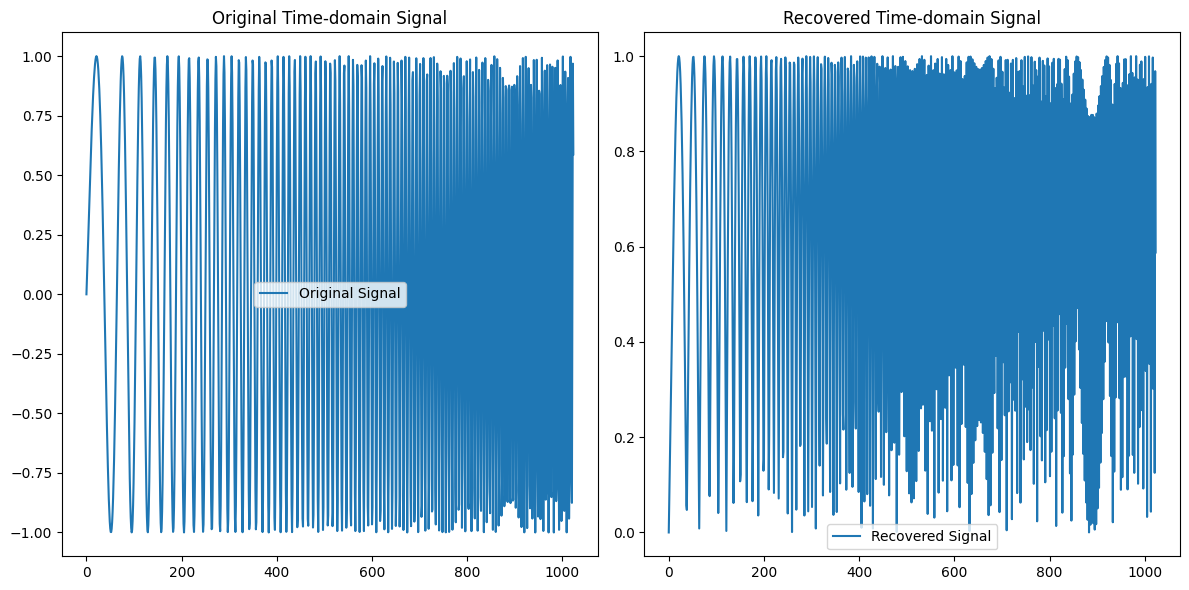

In [ ]:
# Implementing the time-domain phase recovery algorithm with placeholders for the dispersion functions D1(w) and D2(w).
# The user will fill in the specifics of these functions.

import numpy as np
import matplotlib.pyplot as plt

# Placeholder functions for the dispersion-related operations. The user will define these.
def D1(w):
    # Placeholder for the user to define the function based on their research
    return np.ones_like(w)

def D2(w):
    # Placeholder for the user to define the function based on their research
    return np.ones_like(w)

def time_domain_phase_recovery(f1_t, initial_phase_guess, iterations=10):
    """
    Time-domain phase recovery algorithm adapted from the Gerchberg-Saxton algorithm.

    :param f1_t: Measured time-domain signal.
    :param initial_phase_guess: Initial guess for the phase.
    :param iterations: Number of iterations to perform.
    :return: The time-domain signal after phase recovery.
    """
    # Create a complex signal from the magnitude of f1_t and the initial phase guess
    f1_complex = np.abs(f1_t) * np.exp(1j * initial_phase_guess)

    for _ in range(iterations):
        # Forward Fourier Transform to frequency domain
        F1_w = np.fft.fft(f1_complex)

        # Apply the dispersion-related operations
        modified_F1_w = D1(np.fft.fftfreq(f1_t.size)) * F1_w * D2(np.fft.fftfreq(f1_t.size))

        # Inverse Fourier Transform to go back to time domain
        f2_t = np.fft.ifft(modified_F1_w)

        # Update the phase guess with the phase of f2_t
        f1_complex = np.abs(f1_t) * np.exp(1j * np.angle(f2_t))

    return f2_t

# Generate a test signal (chirp) and its initial phase guess
test_signal = generate_chirp_signal(length, start_freq, end_freq, rate)
initial_phase_guess = np.random.rand(length) * 2 * np.pi  # Random initial phase

# Execute the time-domain phase recovery algorithm with the test signal
recovered_signal = time_domain_phase_recovery(test_signal, initial_phase_guess, iterations=50)

# Plot the original and recovered signal for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(test_signal, label='Original Signal')
plt.title('Original Time-domain Signal')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.abs(recovered_signal), label='Recovered Signal')
plt.title('Recovered Time-domain Signal')
plt.legend()

plt.tight_layout()
plt.show()
